In [5]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np


# Function to get the data
def loading_data(directory_path):
    # Dictionary to store images
    img_dic = {}

    # Loop through the files in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith(".jpeg") or filename.endswith(".jpg"):  # Adjust file extensions as needed
            image_path = os.path.join(directory_path, filename)
            img = cv2.imread(image_path)

            # Create a new list for each filename
            img_list = img_dic.get(filename, [])
            img_list.append(img)
            img_dic[filename] = img_list

    return img_dic



def visualize_images(img_dict, title, rows=2, cols=3):
    """
    Visualizes a grid of images.

    Parameters:
        img_dict (dict): Dictionary with filenames as keys and lists of corresponding images as values.
        title (str): Title of the visualization.
        rows (int): Number of rows in the grid. Default is 2.
        cols (int): Number of columns in the grid. Default is 3.
    """
    # Set up the figure for visualization
    fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

    # Flatten the axes array
    axes_flat = axes.ravel()

    # Loop through and display the images
    for i, (filename, images) in enumerate(img_dict.items()):
        if i < len(axes_flat):
            ax = axes_flat[i]
            ax.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
            ax.set_title(f'{filename}')
            ax.axis('off')

    fig.suptitle(title, fontsize=16)
    plt.show()



In [6]:
DAM_path = "data\DAM"
DAM_data = loading_data(DAM_path)

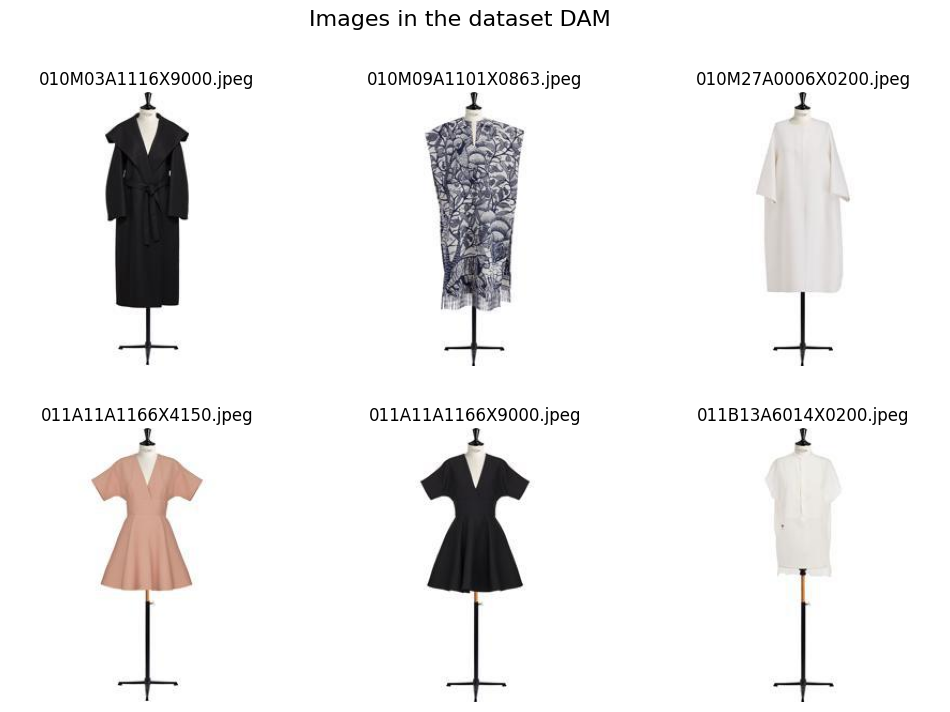

In [8]:
visualize_images(DAM_data,title = 'Images in the dataset DAM')

In [9]:
# Function to get the data
def loading_data_test(directory_path):
    # List to store images
    images = []

    # Loop through the files in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith(".jpeg") or filename.endswith(".jpg"):  # Adjust file extensions as needed
            image_path = os.path.join(directory_path, filename)
            img = cv2.imread(image_path)
            images.append(img)
    return images

In [10]:
test_images_path = "data/test_image_headmind"
test_data = loading_data_test(test_images_path)

In [11]:
def visualize_images_test(images,title):

    # Set up the figure for visualization
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))

    # Loop through and display the images
    for i, ax in enumerate(axes.ravel()):
        if i < len(images):
            ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
            ax.set_title(f'Image {i+1}')
        ax.axis('off')
    fig.suptitle(title, fontsize=16)
    plt.show()

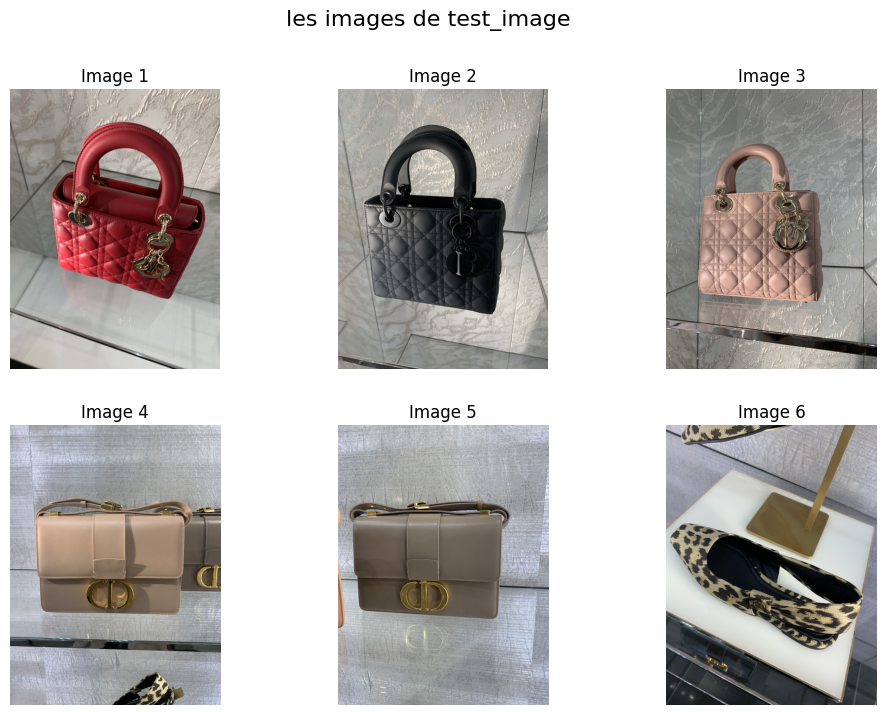

In [12]:
visualize_images_test(test_data,title='les images de test_image')

In [13]:
import pandas as pd
product_list=pd.read_csv("data\product_list.csv")

In [14]:
product_list.head()

MMC Product_BusinessUnitDesc
0  010M03A1116X9000                    W RTW
1  010M09A1101X0863                    W RTW
2  010M27A0006X0200                    W RTW
3  011A11A1166X4150                    W RTW
4  011A11A1166X9000                    W RTW

In [15]:

n_classes = product_list['Product_BusinessUnitDesc'].value_counts()
n_classes

W Bags           830
W RTW            627
W Accessories    543
W Shoes          336
W SLG            302
Watches          129
Name: Product_BusinessUnitDesc, dtype: int64

In [16]:
classes=product_list['Product_BusinessUnitDesc'].unique()
classes

array(['W RTW', 'W SLG', 'W Bags', 'W Shoes', 'Watches', 'W Accessories'],
      dtype=object)

In [17]:
def filter_and_group_by_class(product_list, DAM_data, classes):
    # Get unique classes from the 'Product_BusinessUnitDesc' column

    # Create an empty dictionary to store results for each class
    class_results = {class_name: [] for class_name in classes}

    # Iterate through the DAM_data and filter based on the class
    for jpeg_reference in DAM_data.keys():
        # Remove '.jpeg' extension without using os
        if jpeg_reference.endswith('.jpeg'):
            jpeg_reference_without_extension = jpeg_reference[:-5]
        else:
            jpeg_reference_without_extension = jpeg_reference
        
        mmc_references = product_list.loc[product_list['MMC'] == jpeg_reference_without_extension, 'Product_BusinessUnitDesc']
        
        if not mmc_references.empty:
            current_class = mmc_references.values[0]
            class_results[current_class].append({jpeg_reference: DAM_data[jpeg_reference]})

    return class_results


In [18]:
filtered_DAM_data=filter_and_group_by_class(product_list,DAM_data,classes)

{'W RTW': [{'010M03A1116X9000.jpeg': [array([[[255, 255, 255],
            [255, 255, 255],
            [255, 255, 255],
            ...,
            [255, 255, 255],
            [255, 255, 255],
            [255, 255, 255]],
    
           [[255, 255, 255],
            [255, 255, 255],
            [255, 255, 255],
            ...,
            [255, 255, 255],
            [255, 255, 255],
            [255, 255, 255]],
    
           [[255, 255, 255],
            [255, 255, 255],
            [255, 255, 255],
            ...,
            [255, 255, 255],
            [255, 255, 255],
            [255, 255, 255]],
    
           ...,
    
           [[255, 255, 255],
            [255, 255, 255],
            [255, 255, 255],
            ...,
            [255, 255, 255],
            [255, 255, 255],
            [255, 255, 255]],
    
           [[255, 255, 255],
            [255, 255, 255],
            [255, 255, 255],
            ...,
            [255, 255, 255],
            [255, 255, 2

In [19]:


def visualize_images_by_class(class_results, num_images_per_class=4):
    # Iterate through class_results
    for class_name, results in class_results.items():
        # Set up subplots for each class
        fig, axs = plt.subplots(1, num_images_per_class, figsize=(12, 2))

        # Iterate through images for the class
        for j in range(min(num_images_per_class, len(results))):
            jpeg_reference, image_data = list(results[j].items())[0]
            ax = axs[j]
            ax.imshow(image_data[0])  
            ax.set_title(f'{class_name}\n{jpeg_reference}')
            ax.axis('off')

        plt.tight_layout()
        plt.show()


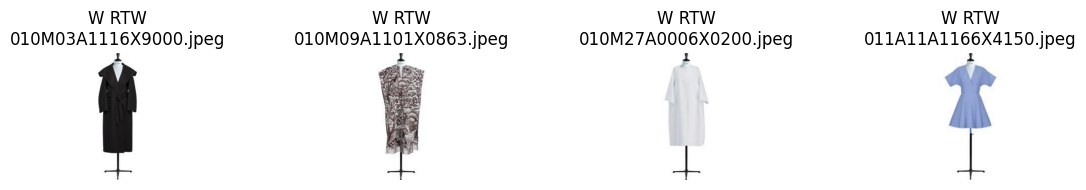

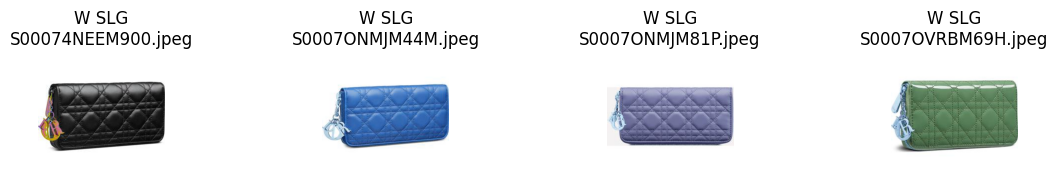

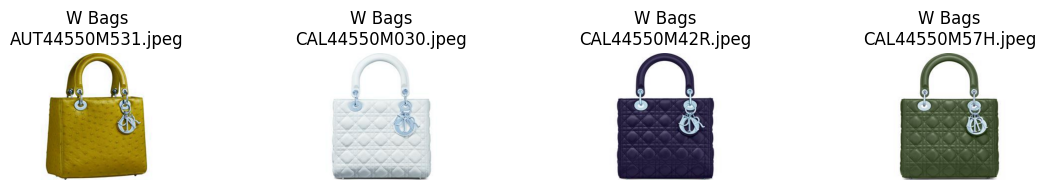

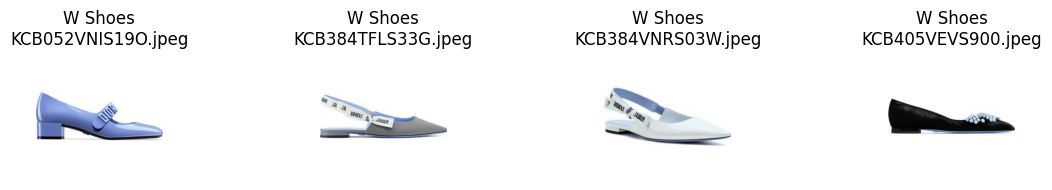

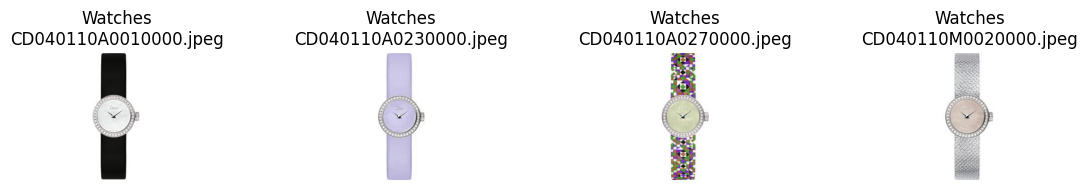

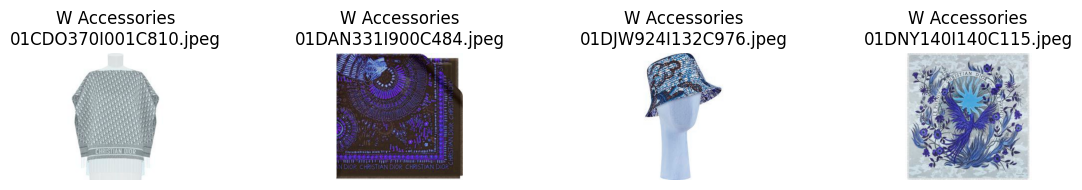

In [20]:
visualize_images_by_class(filtered_DAM_data)

In [21]:
product_list.shape

(2767, 2)

In [22]:

def convert_to_df(data,classname):
# Convert to DataFrame
    df_data = []

    for class_name, class_data in data.items():
        if class_name == classname:
            for item in class_data:
                for img_name, img_data in item.items():
                    df_data.append({
                        'Class': class_name,
                        'ImageName': img_name,
                        'ImageData': img_data[0]  # Assuming there's only one image per entry
                    })
    return pd.DataFrame(df_data)

In [23]:
W_RTW = convert_to_df(filtered_DAM_data,classname='W RTW')
W_RTW.shape

(627, 3)

In [24]:
W_Bags = convert_to_df(filtered_DAM_data,classname='W Bags')
W_Acc = convert_to_df(filtered_DAM_data,classname='W Accessories')
W_SLG = convert_to_df(filtered_DAM_data,classname='W SLG')
W_Shoes = convert_to_df(filtered_DAM_data,classname='W Shoes')
Watches = convert_to_df(filtered_DAM_data,classname='Watches')


## Color analysis

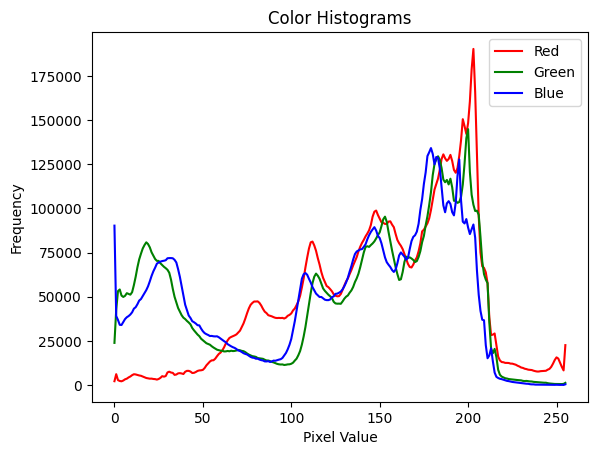

In [25]:
import cv2
import matplotlib.pyplot as plt

def calculate_color_histogram(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate the color histograms
    hist_red = cv2.calcHist([image_rgb], [0], None, [256], [0, 256])
    hist_green = cv2.calcHist([image_rgb], [1], None, [256], [0, 256])
    hist_blue = cv2.calcHist([image_rgb], [2], None, [256], [0, 256])

    return hist_red, hist_green, hist_blue

def plot_color_histograms(hist_red, hist_green, hist_blue):
    plt.plot(hist_red, color='red', label='Red')
    plt.plot(hist_green, color='green', label='Green')
    plt.plot(hist_blue, color='blue', label='Blue')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title('Color Histograms')
    plt.legend()
    plt.show()

# Example usage
image_path = 'data/test_image_headmind/image-20210928-102713-12d2869d.jpg'
hist_red, hist_green, hist_blue = calculate_color_histogram(image_path)
plot_color_histograms(hist_red, hist_green, hist_blue)


## Texture analysis

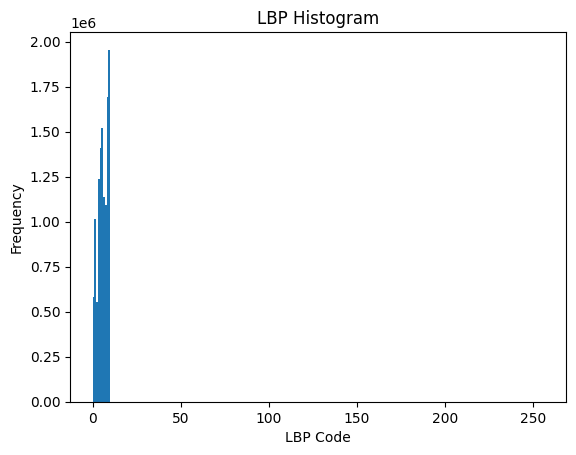

In [27]:
from skimage import feature
import cv2
import matplotlib.pyplot as plt

def calculate_lbp(image_path):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Calculate LBP
    lbp = feature.local_binary_pattern(image, P=8, R=1, method='uniform')

    return lbp

def plot_lbp_histogram(lbp):
    plt.hist(lbp.ravel(), bins=256, range=[0, 256])
    plt.title('LBP Histogram')
    plt.xlabel('LBP Code')
    plt.ylabel('Frequency')
    plt.show()

# Example usage
image_path = 'data/test_image_headmind/image-20210928-102713-12d2869d.jpg'
lbp = calculate_lbp(image_path)
plot_lbp_histogram(lbp)


## Edge detection

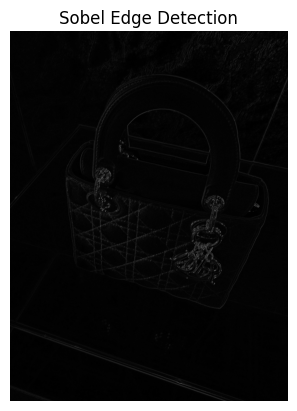

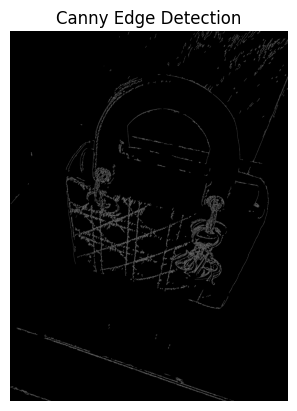

In [28]:
import cv2
import matplotlib.pyplot as plt

def apply_sobel(image_path):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Sobel operator
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    # Calculate the gradient magnitude
    gradient_magnitude = cv2.magnitude(sobel_x, sobel_y)

    return gradient_magnitude

def apply_canny(image_path, low_threshold, high_threshold):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Canny edge detector
    edges = cv2.Canny(image, low_threshold, high_threshold)

    return edges

def plot_edges(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Example usage
image_path = 'data/test_image_headmind/image-20210928-102713-12d2869d.jpg'

# Apply Sobel operator
gradient_magnitude = apply_sobel(image_path)
plot_edges(gradient_magnitude, 'Sobel Edge Detection')

# Apply Canny edge detector
canny_edges = apply_canny(image_path, low_threshold=50, high_threshold=200)
plot_edges(canny_edges, 'Canny Edge Detection')


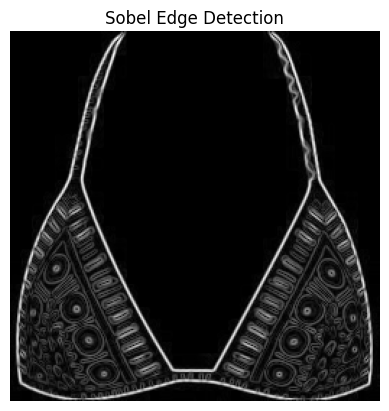

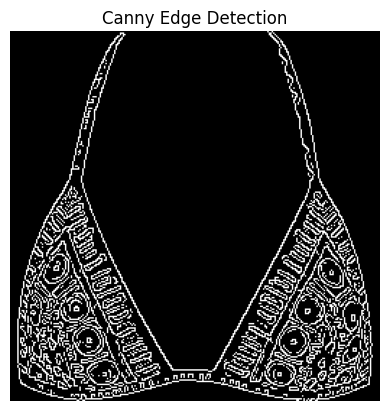

In [29]:
# Example usage
image_path = 'data/DAM/01BB01A2102X4847.jpeg'

# Apply Sobel operator
gradient_magnitude = apply_sobel(image_path)
plot_edges(gradient_magnitude, 'Sobel Edge Detection')

# Apply Canny edge detector
canny_edges = apply_canny(image_path, low_threshold=50, high_threshold=150)
plot_edges(canny_edges, 'Canny Edge Detection')

## Clustering the test images

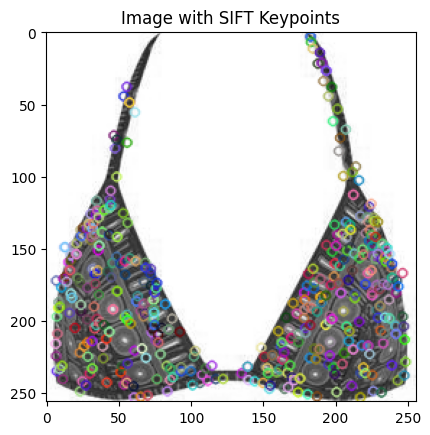

In [31]:
import cv2
import matplotlib.pyplot as plt

# Load an image
image_path = 'data/DAM/01BB01A2102X4847.jpeg'
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create a SIFT object
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(gray, None)

# Draw keypoints on the image
img_with_keypoints = cv2.drawKeypoints(gray, keypoints, None)

# Display the image with keypoints
plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Image with SIFT Keypoints')
plt.show()


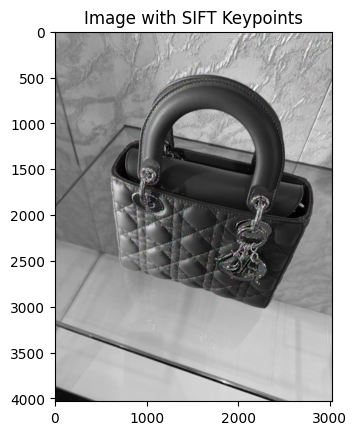

In [32]:
import cv2
import matplotlib.pyplot as plt

# Load an image
image_path = 'data/test_image_headmind/image-20210928-102713-12d2869d.jpg'
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create a SIFT object
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(gray, None)

# Draw keypoints on the image
img_with_keypoints = cv2.drawKeypoints(gray, keypoints, None)

# Display the image with keypoints
plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Image with SIFT Keypoints')
plt.show()


# Data preprocessing

In [33]:
from PIL import Image
import os
import numpy as np
import pandas as pd

# Charger le fichier CSV
csv_path = 'data/product_list.csv'
df = pd.read_csv(csv_path)



# Taille cible pour les images
target_size = (256, 256)

# Fonction de prétraitement
def preprocess_image(image_path, target_size):
    # Charger l'image
    img = Image.open(image_path)
    # Redimensionner l'image
    img = img.resize(target_size)
    # Convertir l'image en tableau NumPy et normaliser les valeurs des pixels
    img_array = np.array(img) / 255.0
    return img_array


# Liste pour stocker les images prétraitées et les étiquettes
dam_images = []
dam_labels = []

# Prétraitement des images DAM
for img_file in os.listdir(DAM_path):
    img_path = os.path.join(DAM_path, img_file)
    img_array = preprocess_image(img_path, target_size)
    dam_images.append(img_array)
    # Extraire le code MMC à partir du nom du fichier
    mmc_code = img_file.split('.')[0]
    dam_labels.append(df[df['MMC'] == mmc_code]['Product_BusinessUnitDesc'].values[0])

# Prétraitement des images de test
test_images = []
test_file_names = []

test_folder=test_images_path

for img_file in os.listdir(test_folder):
    img_path = os.path.join(test_folder, img_file)
    img_array = preprocess_image(img_path, target_size)
    test_images.append(img_array)
    test_file_names.append(img_file)

# Convertir la liste en tableau NumPy
test_images = np.array(test_images)


In [34]:

num_samples = 5


print("la taille des images de test avant prétraitement :")
for i in range(num_samples):
    print(test_data[i].shape)

print('\n')
print("la taille des images de test après prétraitement :")
# Afficher la taille des images du dossier de test
for i in range(num_samples):
    print(test_images[i].shape)


la taille des images de test avant prétraitement :
(4032, 3024, 3)
(4032, 3024, 3)
(4032, 3024, 3)
(4032, 3024, 3)
(4032, 3024, 3)


la taille des images de test après prétraitement :
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
